In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
# Load data dalam csv
df = pd.read_csv('ai4i2020.csv')

In [96]:
# Menampilkan 5 data pertama
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [97]:
# Menampilkan statistik deskriptif dari data
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [98]:
# Mengecek apakah ada data yang kolomnya tidak lengkap
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [140]:
# Menampilkan korelasi antara dua fitur
correlation_matrix = df.drop(['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1).corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [101]:
# Membuat model regresi logistik
model = LogisticRegression()

In [103]:
# Ekstrasi fitur dan reshape
X = df.drop(['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1).values.reshape(-1,5)
Y = df['Machine failure'].values.reshape(-1,1)

In [120]:
# Membagi data menjadi 8:2, 8 untuk train dan 2 untuk test, dengan state 3
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=3)


In [121]:
# Melatih model
model.fit(X1_train, y1_train)

c:\Users\ADVAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [122]:
# Lakukan prediksi machine failure dari data test
res = model.predict(X1_test)
res

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[Text(0, 0.5, 'No (0)'), Text(0, 1.5, 'Yes (1)')]

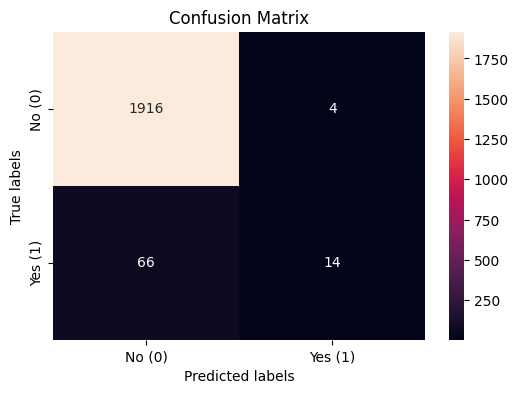

In [134]:
# Membuat visualisasi untuk confusion matrix
import seaborn as sns

plt.figure(figsize= (6,4))

cm = confusion_matrix(y1_test, res, labels=[0,1])

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No (0)', 'Yes (1)'])
ax.yaxis.set_ticklabels(['No (0)', 'Yes (1)'])

In [136]:
# Menampilkan classification report dan skor ROC AUC
print('Classification Report:')
print(classification_report(y1_test, res, target_names=['0', '1']))

y_prob = model.predict_proba(X1_test)[:, 1]
roc_auc = roc_auc_score(y1_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1920
           1       0.78      0.17      0.29        80

    accuracy                           0.96      2000
   macro avg       0.87      0.59      0.63      2000
weighted avg       0.96      0.96      0.95      2000

ROC AUC Score: 0.91


In [137]:
# Menampilkan koefisien dari model regresi logistik
print('Coefficient of Logistic Regression Model is : ' + str(model.coef_ ))

Coefficient of Logistic Regression Model is : [[ 0.81436647 -0.89733348  0.01090477  0.27121846  0.01283102]]


<Axes: >

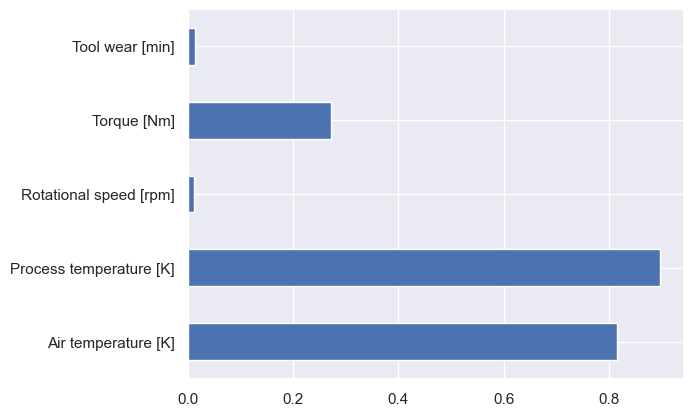

In [139]:
# Menampilkan nilai pengaruh setiap fitur
dict_importance_features = {'Importance_Feature' : abs(model.coef_[0])}

importance_features_dataframe = pd.DataFrame( dict_importance_features)

importance_features_dataframe.index = df.drop(['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis = 1).columns

sns.set_theme()

importance_features_dataframe['Importance_Feature'].plot(kind="barh")